# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

#### Строим матрицу переходных вероятностей

In [51]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [52]:
with open('tom_1.txt', 'r') as f:
    text = f.read().lower()
text = re.sub('[^а-я]','', text)

In [53]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщьъыэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [59]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1
    
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

/Users/kostya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


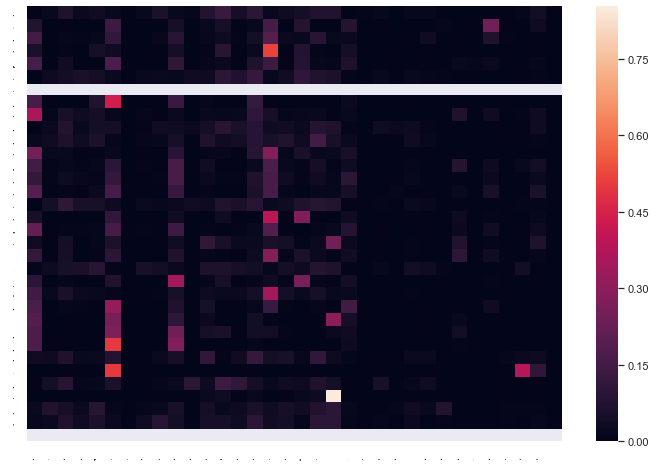

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(df)
plt.show()

#### Вероятность встретить слово из 4-х букв с п вначалае и р в конце

In [340]:
start = POS['п']
end = POS['р']
summary = 0
prior = 1. / len(RUSSIAN)
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if proba > 0:
            summary += proba 

print(summary)

0.001288514181378159


#### Генерируем слово из 8 букв, начинающееся на Б

In [448]:
s = []
start = RUSSIAN[1]
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

быстайир


#### Просто смеха ради генератор слов )

In [339]:
list1 = []
length1 = 7
length2 = 20
for m in range(length2):
    s = []
    start = np.random.choice(list(RUSSIAN))
    s.append(start)
    for i in range(length1):
        index = POS[s[i]]
        next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
        s.append(next_char)
    list1.append(''.join(s))

print(list1)

['юарыхопо', 'митосизя', 'чтихольк', 'всолирен', 'креушкор', 'ротозяза', 'этодрбос', 'йгронана', 'исьсивый', 'ротбилуд', 'уютьаушп', 'бодпоняп', 'лайкаежн', 'ованебыв', 'тилитьпе', 'цотокотд', 'ловоблас', 'гонакалл', 'аинесецу', 'сьенолже']


### Задание 2

In [561]:
from hmmlearn.hmm import GaussianHMM

In [562]:
series = pd.read_csv("monthly-boston-armed-robberies-j.csv")["Count"]

In [563]:
values = series.values.reshape(-1,1)

In [564]:
for n in range(1, 10):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -739.512376545524
2 -652.7824661820224
3 -629.4670322744707
4 -593.962983688186
5 -577.8593153999469
6 -571.3172772177159
7 -561.1297217988872
8 -557.2523058528894
9 -554.9697283666828


In [565]:
comp = 9

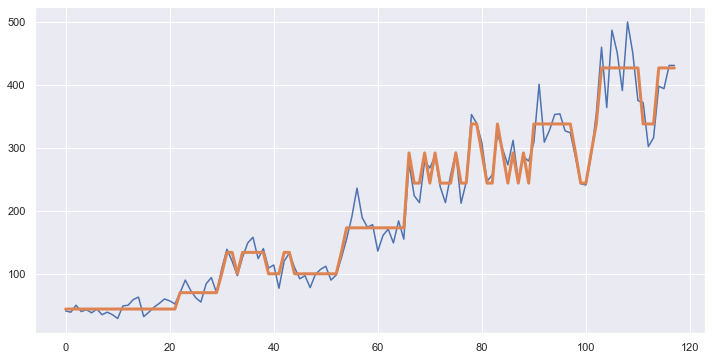

In [566]:
model = GaussianHMM(n_components=comp,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [570]:
np.shape(means)

(118, 1)

прогноз

In [571]:
#список последовательных появлений средних в ряде
means_list_full = np.ndarray.tolist(means)

means_list = []
for i in means_list_full:
    for n in i:
        means_list.append(n)

In [572]:
#создаем набор униклаьных средних и индексы к ним в словаре 
umeans = np.unique(means)
POS = {l: i for i, l in enumerate(umeans)}

In [573]:
probabilities = np.zeros((comp, comp))

In [574]:
for m1, m2 in zip(means_list[:-1], means_list[1:]):
    probabilities[POS[m1], POS[m2]] += 1
    
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

df = pd.DataFrame(probabilities, index=(c for c in umeans), columns=(c for c in umeans))

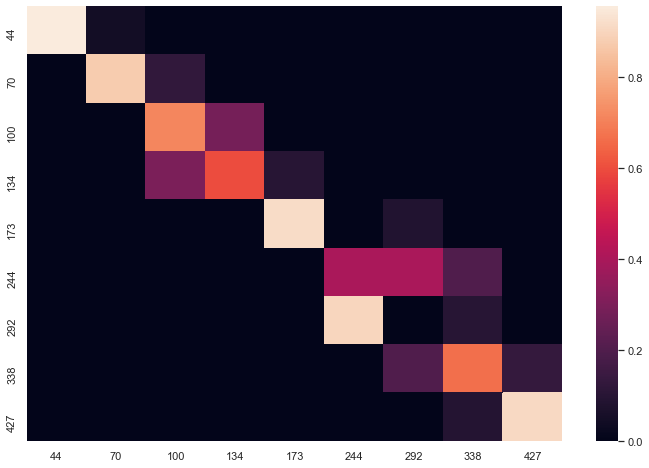

In [575]:
plt.figure(figsize=(12,8))
sns.heatmap(df)
plt.show()

In [594]:
forecast = []
start = means_list[-1]
forecast.append(start)
length = 10

for i in range(length):
    index = POS[series[i]]
    next_ = np.random.choice(list(umeans), p=probabilities[index])
    forecast.append(next_)

print (forecast)

[427, 427, 292, 244, 338, 244, 338, 244, 244, 338, 244]


In [597]:
for i in forecast:
    means_list.append(i)

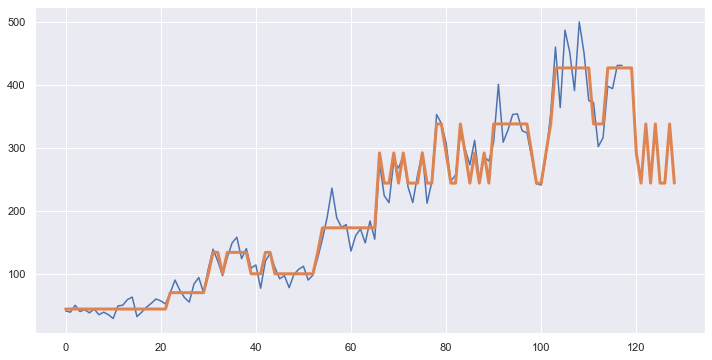

In [601]:
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means_list, linewidth=3)